In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
#import dataset
dataset = pd.read_csv("datasets/TSLA.csv")

In [8]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [10]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [11]:
#scale values to range 0-1
trainset = dataset.iloc[:, 3:4].values
scaler = MinMaxScaler(feature_range = (0,1))
data_scaled = scaler.fit_transform(trainset)
data_scaled

array([[4.21744904e-04],
       [1.37067094e-03],
       [8.71496305e-04],
       ...,
       [7.56796518e-01],
       [8.01812864e-01],
       [8.12026969e-01]])

In [12]:
# split dataset to train and test sets
x_train, y_train = [], []
x_test, y_test = [], []

window = 70

# Training set
for i in range(window, len(data_scaled)):
    x_train.append(data_scaled[i - window:i, 0])
    y_train.append(data_scaled[i, 0])

# Testing set
for i in range(len(data_scaled) - window, len(data_scaled)):
    x_test.append(data_scaled[i - window:i, 0])
    y_test.append(data_scaled[i, 0])

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)


In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [14]:
#build LSTM neural network model
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [15]:
#train model
regressor.fit(x_train, y_train,epochs = 30, batch_size = 32)

Epoch 1/30
91/91 [==============================] - 6s 44ms/step - loss: 0.0064
Epoch 2/30
91/91 [==============================] - 4s 47ms/step - loss: 0.0015
Epoch 3/30
91/91 [==============================] - 4s 47ms/step - loss: 0.0014
Epoch 4/30
91/91 [==============================] - 4s 47ms/step - loss: 0.0016
Epoch 5/30
91/91 [==============================] - 4s 47ms/step - loss: 0.0014
Epoch 6/30
91/91 [==============================] - 4s 47ms/step - loss: 0.0015
Epoch 7/30
91/91 [==============================] - 4s 47ms/step - loss: 0.0011
Epoch 8/30
91/91 [==============================] - 4s 47ms/step - loss: 0.0012
Epoch 9/30
91/91 [==============================] - 4s 48ms/step - loss: 0.0011
Epoch 10/30
91/91 [==============================] - 4s 49ms/step - loss: 0.0012
Epoch 11/30
91/91 [==============================] - 4s 48ms/step - loss: 0.0010
Epoch 12/30
91/91 [==============================] - 4s 48ms/step - loss: 0.0011
Epoch 13/30
91/91 [==================

In [16]:
#generate prices for test data
predicted_price = regressor.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)
predicted_price

3/3 [==============================] - 1s 9ms/step


array([[ 990.61633],
       [ 982.12   ],
       [ 971.28143],
       [ 959.3944 ],
       [ 947.38715],
       [ 935.53455],
       [ 924.2547 ],
       [ 918.9676 ],
       [ 923.8924 ],
       [ 943.15405],
       [ 973.7963 ],
       [1007.1113 ],
       [1034.4445 ],
       [1051.7421 ],
       [1065.0918 ],
       [1076.0311 ],
       [1081.5968 ],
       [1077.13   ],
       [1063.4855 ],
       [1042.836  ],
       [1023.7184 ],
       [1013.26514],
       [1009.9712 ],
       [1010.3693 ],
       [1012.0508 ],
       [1012.1395 ],
       [1009.9116 ],
       [1002.3231 ],
       [ 984.40845],
       [ 961.66656],
       [ 939.62335],
       [ 917.33203],
       [ 893.5473 ],
       [ 873.81006],
       [ 863.8934 ],
       [ 863.9148 ],
       [ 870.5237 ],
       [ 879.77405],
       [ 889.90405],
       [ 898.7246 ],
       [ 906.64307],
       [ 911.97156],
       [ 911.1288 ],
       [ 904.3641 ],
       [ 896.4692 ],
       [ 891.05304],
       [ 887.6708 ],
       [ 883.

In [17]:
#get real price for comparison
real_price =  scaler.inverse_transform(y_test.reshape(-1, 1))
real_price

array([[ 930.      ],
       [ 928.25    ],
       [ 921.849976],
       [ 909.039978],
       [ 893.390015],
       [ 886.119995],
       [ 957.049988],
       [ 997.559998],
       [1070.719971],
       [1078.420044],
       [1064.140015],
       [1053.150024],
       [1054.589966],
       [1136.040039],
       [1123.050049],
       [1081.01001 ],
       [1020.5     ],
       [1010.      ],
       [ 980.      ],
       [1038.819946],
       [1072.589966],
       [1026.540039],
       [1013.380005],
       [1016.059998],
       [ 995.      ],
       [ 994.      ],
       [ 940.5     ],
       [ 851.469971],
       [ 903.210022],
       [ 906.      ],
       [ 829.      ],
       [ 792.01001 ],
       [ 862.049988],
       [ 905.      ],
       [ 889.409973],
       [ 880.52002 ],
       [ 881.169983],
       [ 902.710022],
       [ 894.799988],
       [ 920.      ],
       [ 896.700012],
       [ 850.700012],
       [ 853.150024],
       [ 893.380005],
       [ 901.210022],
       [ 8

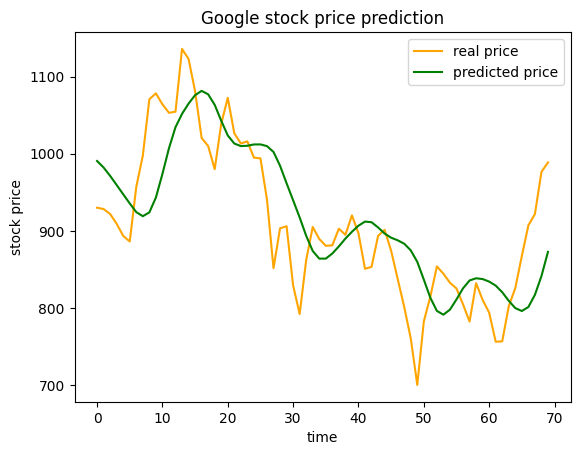

In [18]:
#plot predicted and real price
plt.plot(real_price, color = 'orange', label = 'real price')
plt.plot(predicted_price, color = 'green', label = 'predicted price')
plt.title('Google stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [19]:
#metrics
print(f'RMSE {metrics.mean_squared_error(predicted_price, real_price, squared=False)}')
print(f'MAE {metrics.mean_absolute_error(predicted_price, real_price)}')

RMSE 66.93980254921908
MAE 53.27715371160714
